In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import os
if os.name == 'nt' :  # windos os  font
    font_family = 'Malgun Gothic'
else: #mac os
    font_family = 'ApppleGothic'

# - 값이 깨지는 문제 해결을 위해 파라미터값 설정
sns.set(font=font_family, rc = {'axes.unicode_minus' : False})

In [2]:
#데이터 생성
s_x = np.linspace(-5, 100, 1000)
s_df = pd.DataFrame(s_x)

In [3]:
s_df.head()

,0
0,-5.000000
1,-4.894895
2,-4.789790
3,-4.684685
4,-4.579580


In [5]:
#차원정리
s_df_sqz = s_df.squeeze('columns')

In [11]:
#각 샘플 수에 따른 1000개 평균 계산
sample_data = pd.DataFrame({
    'dist' : s_df_sqz.sample(1000),
    'type' : 'Data',
})    
sample_mean_05 = pd.DataFrame({
    'dist': [s_df_sqz.sample(5). mean() for _ in range(1000)],
    'type': '5개 샘플평균'
})
sample_mean_10 = pd.DataFrame({
    'dist': [s_df_sqz.sample(10). mean() for _ in range(1000)],
    'type': '10개 샘플평균'
})
sample_mean_20 = pd.DataFrame({
    'dist': [s_df_sqz.sample(20). mean() for _ in range(1000)],
    'type': '20개 샘플평균'
})
sample_mean_30 = pd.DataFrame({
    'dist': [s_df_sqz.sample(30). mean() for _ in range(1000)],
    'type': '30개 샘플평균'
})

result = pd.concat([sample_data, sample_mean_05 ,sample_mean_10, sample_mean_20, sample_mean_30])

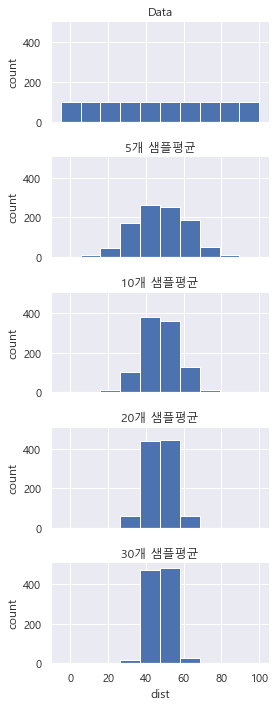

In [14]:
#샘플 수에 따른 표본평균의 시각화
g= sns.FacetGrid(result, col = 'type', col_wrap = 1, height=2, aspect=2)

g.map(plt.hist, 'dist', range=[-5, 100], bins=10)
g.set_axis_labels('dist','count')
g.set_titles('{col_name}')

plt.tight_layout()
plt.show()

In [16]:
#기대값이 50이고 표준편차가 10인 정규분포
#구간 내에 숫자를 균일한 간격으로 생성
norm =stats.norm(loc=50, scale=10)

# -10~ 123 까지 2000개 생성
s_x = np.linspace(-10, 120 ,2000)
#확률밀도함수
s_pdf = norm.pdf(s_x)

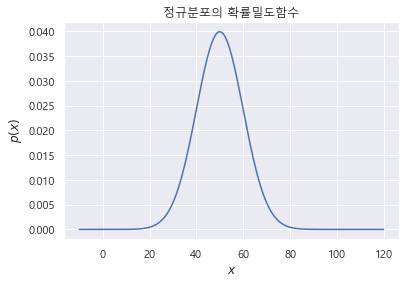

In [17]:
#정규분포 시각화
plt.plot(s_x, s_pdf)
plt.title("정규분포의 확률밀도함수")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.show()

In [30]:
#동전을 던졌을 떄 앞면과 뒷면이 나오는 경우의 표본 데이터(n=100)를 10회 수집

bag_of_mean = []

for i in range(10):
    m = np.random.binomial(n=1, p=0.5, size= 100).mean()
    bag_of_mean.append(m)

<AxesSubplot:ylabel='Frequency'>

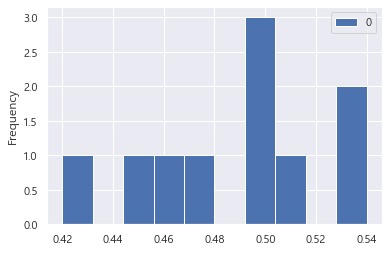

In [31]:
pd.DataFrame(bag_of_mean).plot.hist()

In [32]:
#동전을 던졌을 떄 앞면과 뒷면이 나오는 경우의 표본 데이터(n=100)를 500회 수집

bag_of_mean = []

for i in range(500):
    m = np.random.binomial(n=1, p=0.5, size= 100).mean()
    bag_of_mean.append(m)

<AxesSubplot:ylabel='Frequency'>

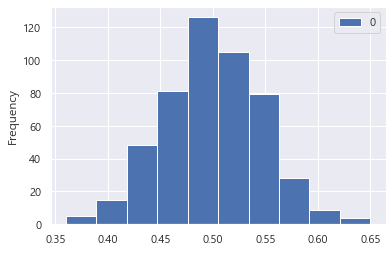

In [33]:
pd.DataFrame(bag_of_mean).plot.hist()

In [34]:
#동전을 던졌을 떄 앞면과 뒷면이 나오는 경우의 표본 데이터(n=100)를 1000회 수집

bag_of_mean = []

for i in range(1000):
    m = np.random.binomial(n=1, p=0.5, size= 100).mean()
    bag_of_mean.append(m)

<AxesSubplot:ylabel='Frequency'>

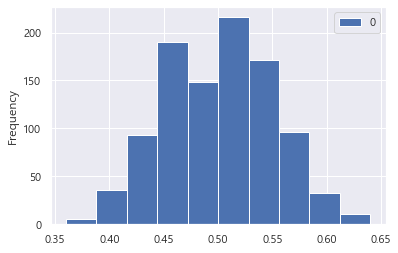

In [35]:
pd.DataFrame(bag_of_mean).plot.hist()

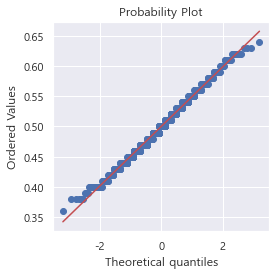

In [36]:
#위 동전실험 사례에 샘플 1000개는 정규성을 따른다고 판단

fig, ax = plt.subplots(figsize=(4,4))

#norm_sample = stats.norm.rvs(size =100)
stats.probplot(bag_of_mean, plot=ax)

plt.tight_layout()
plt.show()

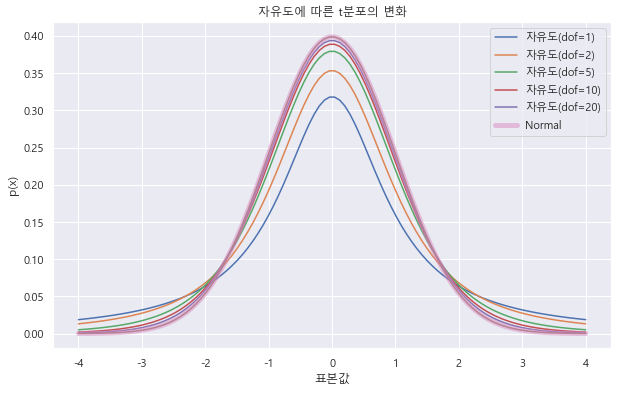

In [40]:
#자유도에 따른 t 분포 확인
t_data = np.linspace(-4, 4, 100)

#플로 사이즈 지점
plt.figure(figsize = (10, 6))

for dof in [1,2,5,10,20]:
    t_dist = stats.t(df=dof)
    plt.plot(t_data, t_dist.pdf(t_data), label = ("자유도(dof=%d)" % dof))

plt.plot(t_data, stats.norm(). pdf(t_data))

plt.plot(t_data, stats.norm().pdf(t_data), label = "Normal", lw=5, alpha=0.5)
plt.title("자유도에 따른 t분포의 변화")
plt.xlabel("표본값")
plt.ylabel("p(x)")
plt.legend()

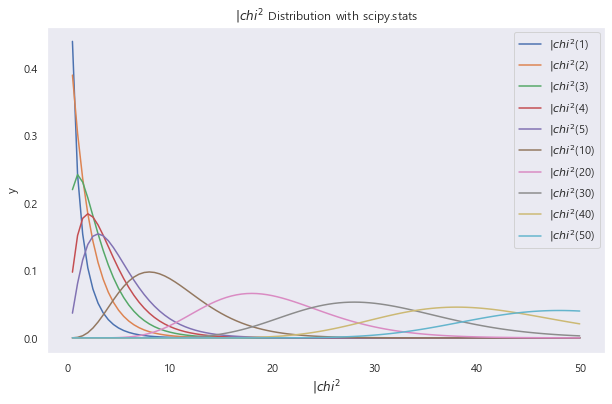

In [46]:
#카이제곱분포 표현
from scipy.stats import chi2

#라인스페이스 x축 설정
Chi_x = np.linspace(0.5, 50, 100)

plt.figure(figsize = (10, 6))

#자유도에 따른 카이제곱분포
for dof in [1,2,3,4,5,10,20,30,40,50] :
    plt.plot(Chi_x, stats.chi2(dof).pdf(Chi_x), label = r'$|chi^2$(' + str(dof) + ')')

plt.xlabel(r'$|chi^2$')
plt.ylabel("y")
plt.grid()
plt.title( r'$|chi^2$ Distribution with scipy.stats')
plt.legend()

In [48]:
f_data = np.linspace(0.05, 3, 1000)

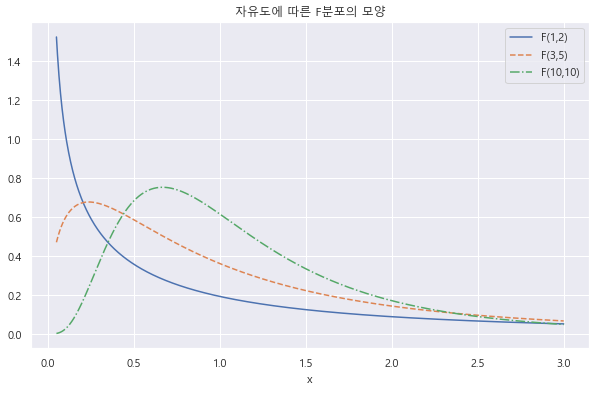

In [49]:
plt.figure(figsize=(10,6))
plt.plot(f_data, stats.f(1,2).pdf(f_data), ls="-", label="F(1,2)")
plt.plot(f_data, stats.f(3,5).pdf(f_data), ls="--", label = "F(3,5)")
plt.plot(f_data, stats.f(10,10).pdf(f_data), ls="-.", label = "F(10,10)")
plt.xlabel("x")
plt.title("자유도에 따른 F분포의 모양")
plt.legend()